<a href="https://colab.research.google.com/github/PariaGhaheri/Classification_of_Parkinson_Disease/blob/main/Classification_of_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as st
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
sns.set()
%matplotlib inline

# Splitting the data into train set and test set

In [2]:
dataset = pd.read_csv('ReplicatedAcousticFeatures_PD.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Classification

In [3]:
model1 = lgb.LGBMClassifier()
model2 = XGBClassifier(eta=0.001, gamma=0, n_estimators=94)
model3= GradientBoostingClassifier()
model4 = BaggingClassifier(XGBClassifier(eta=0.001, gamma=0, n_estimators=94))

# Weighted Hard Voting

In [4]:
model = VotingClassifier(estimators=[('lgb', model1),('xgb', model2), ('gb', model3), ('bc', model4)],weights=(6,13,6,1), voting='hard')

# K-Fold Cross Validation & making Confusion Matrix

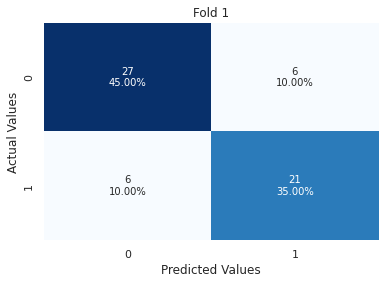

F1-score: 0.7777777777777778
Precision: 0.7777777777777778
Specificity: 0.8181818181818182
Sensitivity: 0.7777777777777778


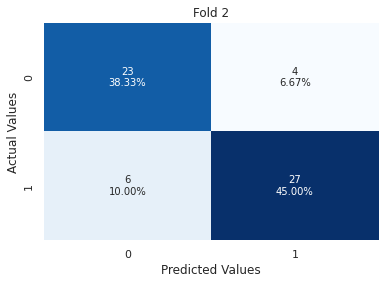

F1-score: 0.84375
Precision: 0.8709677419354839
Specificity: 0.8518518518518519
Sensitivity: 0.8181818181818182


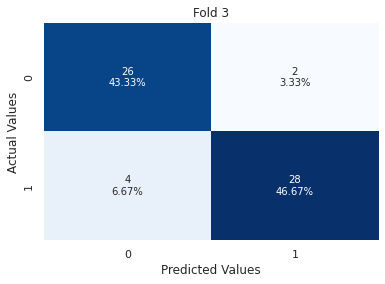

F1-score: 0.9032258064516129
Precision: 0.9333333333333333
Specificity: 0.9285714285714286
Sensitivity: 0.875


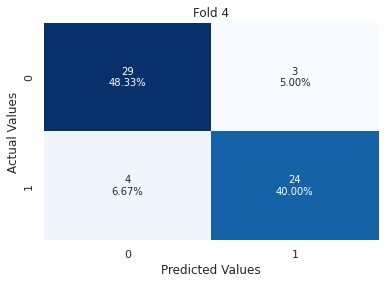

F1-score: 0.8727272727272727
Precision: 0.8888888888888888
Specificity: 0.90625
Sensitivity: 0.8571428571428571
Average:
Accuracy: 85.42 %
[[105  15]
 [ 20 100]]
F1-score: 0.8493702142391658
Precision: 0.867741935483871
Specificity: 0.8762137746512746
Sensitivity: 0.8320256132756133


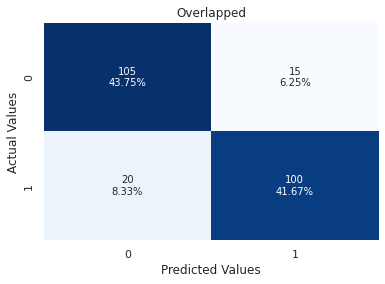

In [11]:
maxAccuracy=0
sum_tn, sum_tp, sum_fp, sum_fn, sum_spe, sum_f1, sum_pre, sum_sen = 0, 0, 0, 0, 0, 0, 0, 0
l =1
kf = KFold(n_splits=4, random_state=5404, shuffle=True)
for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, model.predict(X_test))
      accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
      
      group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
                      
      group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
                     
      labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_counts,group_percentages)]
         
      labels = np.asarray(labels).reshape(2,2)

      #building the confusion matrix for 4 folds

      ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
      ax.set_title('Fold '+ str(l));
      ax.set_xlabel('Predicted Values')
      ax.set_ylabel('Actual Values');
      ## Ticket labels - List must be in alphabetical order
      ax.xaxis.set_ticklabels(['0','1'])
      ax.yaxis.set_ticklabels(['0','1'])
      ## Display the visualization of the Confusion Matrix.
      plt.show()
      ax.figure.savefig("Fold_" + str(l) + ".svg",  dpi='figure')
      f1 = f1_score(y_test, y_pred)
      print(f"F1-score: {f1}")
      sum_f1 += f1 
      pre = precision_score(y_test, y_pred)
      print(f"Precision: {pre}")
      sum_pre += pre
      tn, fp, fn, tp = cm.ravel()
      sum_tn += tn
      sum_tp += tp
      sum_fn += fn
      sum_fp += fp
      Specificity =  tn / (tn+fp)
      print(f"Specificity: {Specificity}")
      sum_spe += Specificity
      Sensitivity = tp / (fn+tp)
      print(f"Sensitivity: {Sensitivity}")
      sum_sen += Sensitivity
      l+=1
      print('==========================================================')

#building the overlapped confusion matrix

print('Average:')
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
cm = np.array([[sum_tn, sum_fp], [sum_fn, sum_tp]])
print(cm)
print(f"F1-score: {sum_f1 / 4}")
print(f"Precision: {sum_pre / 4}")
print(f"Specificity: {sum_spe / 4}")
print(f"Sensitivity: {sum_sen / 4}")

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
                     
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
                    
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
         
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

ax.set_title('Overlapped');      
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
 
plt.show()


ax.figure.savefig("overlapped.svg")
